In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Exploratory Data Analysis (EDA) - Looking at the data

In [3]:
data.info()#gives us info about the data, if null values are present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
#Another method to check presence of null values
data.isna().sum()#shows absence of null values

Hours     0
Scores    0
dtype: int64

In [5]:
#Summary statistics/Descriptive
data.describe()#gives us the summary of data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


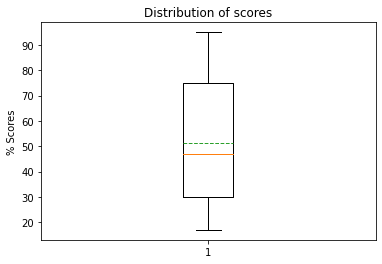

In [6]:
fig1, ax1 = plt.subplots()
ax1.set_title('Distribution of scores')
ax1.set_ylabel('% Scores')
ax1.boxplot(data['Scores'], showmeans=True, meanline=True)#boxplot to show distribution of the variable
plt.show()

**Inference:** The above plot shows that the data distribution is slightly skewed to left as relatively more data points are present above 50% 

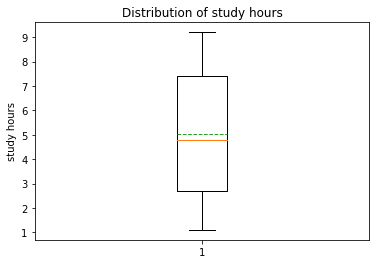

In [7]:
fig1, ax1 = plt.subplots()
ax1.set_title('Distribution of study hours')
ax1.set_ylabel('study hours')
ax1.boxplot(data['Hours'], showmeans=True, meanline=True)
plt.show()

**Inference:** The plot evidently shows that the data distribution is slightly skewed to left indicated by
the median occuring before the mean 

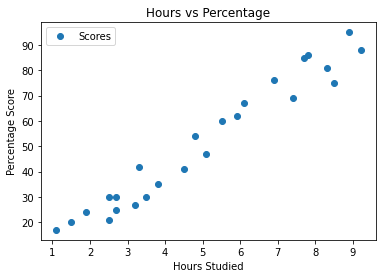

In [8]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**Inference:** The above scatter plot depicts there is a positive correlation between the Scores % and Study hours of an individual 

In [9]:
data['Hours'].corr(data['Scores'])#this gives us the correlation between the study hours and % scores

0.9761906560220887

The pearson score nearer to 1 indicates a very **strong positive relationship** between the variables.

### **Making the Model**

In [10]:
X = data.iloc[:, :-1]#all the data except target(scores) goes into X as features/input/independent
y = data.iloc[:, 1] #target_data/dependent variable goes into y 

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn import metrics

In [13]:
def datasplitter(X,y,size_test):#splits the data according to given test size
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size_test, random_state=0)
    return X_train, X_test, y_train, y_test

In [14]:
def model(X_train, y_train):#makes the regression model from given data, takes training data as arguments
    from sklearn.linear_model import LinearRegression  
    lm = LinearRegression()  
    rm = lm.fit(X_train, y_train)
    return rm


In [15]:
def predictor(X_test, rm):#predicts the target value(score), takes the test data and model OBJECT
    y_pred = rm.predict(X_test) # Predicting the scores
    return y_pred

In [16]:
def evaluator(y_test, y_pred):#evaluates the generated model based on the mae, r2 scores
    mae = metrics.mean_absolute_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    return mae, r2

In [17]:
size = []
mae_ = []
r2_score = []

In [18]:
for i in range(0, 21):
    j = 0.15 + (i/100)
    X_train, X_test, y_train, y_test = datasplitter(X,y,j)
    rm = model(X_train, y_train)
    y_pred = predictor(X_test, rm)
    mae, r2 = evaluator(y_test, y_pred)
    size.append(j)
    mae_.append(mae)
    r2_score.append(r2)
    

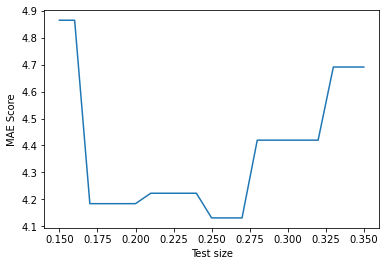

In [19]:
plt.plot(size, mae_);
plt.xlabel('Test size')
plt.ylabel('MAE Score')
plt.show()

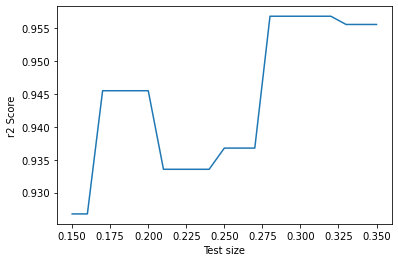

In [20]:
plt.plot(size, r2_score);
plt.xlabel('Test size')
plt.ylabel('r2 Score')
plt.show()

##### **Inference:** ##### 
The lower mean absolute error(mae) value indicates less difference between the predicted value and original target value while the r2 score is indicative of generalization capability of the model. If r2 score is closer to 1 it is indicative of model generalising well. So from the above plots it is evident that the test size in the range of 0.275 - 0.290 gives a better value of mae and r2  

### **Making Predictions**

In [21]:
X_train, X_test, y_train, y_test = datasplitter(X,y,0.285)
rm = model(X_train, y_train)
y_pred = predictor(X_test, rm)
mae, r2 = evaluator(y_test, y_pred)


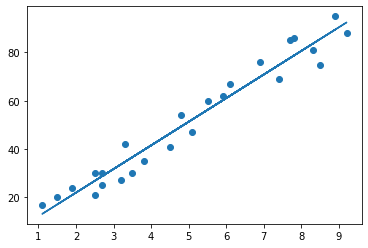

In [22]:
# Plotting the regression line
line = (rm.coef_ * X) + rm.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [23]:
print(X_test) # Testing data - In Hours
y_pred = rm.predict(X_test) # Predicting the scores

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9
22    3.8
17    1.9
24    7.8


In [24]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


In [25]:
# test with your own data
hours = 9.25
own_pred = rm.predict(np.array(hours).reshape(1,-1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.91505723477056
